## MP1 Checkpoint1
Shuyue Xiao: shuyuex2, registered       
Aditya Hemant Kadrekar: ak31, registered    
Chenpeng Zhao, cz28, registered

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## TASK 0

### 1.

In [78]:
# importing the disengagement dataset
df_disengagements = pd.read_csv('mp1_av_disengagements.csv')
# importing the total miles dataset
df_totalmiles = pd.read_csv('mp1_av_totalmiles.csv')

In [67]:
# using the head function to get a view of the dataset
df_disengagements.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [4]:
# using the head function to get a view of the dataset
df_totalmiles.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30


### 2.

### a.

In [5]:
# total number of disengagements over the entire duration of available data
len(df_disengagements)

1024

### b.

In [6]:
# creating a new column which separates the month and year from the Month column
df_disengagements['sep_month'] = df_disengagements['Month'].apply(lambda x:x.split('-')[1])

In [7]:
# unique function gives the unique values in sep_month
df_disengagements['sep_month'].unique()

array(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug'], dtype=object)

In [8]:
# number of unique months that have recorded AV disengagements
len(df_disengagements['sep_month'].unique())

12

### c.

In [9]:
# list of unique locations of AV disengagements
df_disengagements['Location'].unique()

array(['urban-street', 'highway'], dtype=object)

### d.

In [10]:
df_disengagements['Cause'].unique()

array(['Incorrect Traffic Light Detection',
       'Adverse road surface conditions', 'Position Estimation Failure',
       'Emergency Vehicle', 'Software Froze', 'Hardware Fault',
       'Incorrect behavior prediction of others',
       'Recklessly behaving agent', 'System Tuning and Calibration',
       'Unwanted Driver Discomfort'], dtype=object)

In [11]:
# number of unique causes for AV disengagements
len(df_disengagements['Cause'].unique())

10

### e.

In [12]:
df_disengagements.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 8 columns):
Month            1024 non-null object
Car              1024 non-null object
Location         1024 non-null object
Weather          1024 non-null object
TypeOfTrigger    1024 non-null object
ReactionTime     492 non-null float64
Cause            1024 non-null object
sep_month        1024 non-null object
dtypes: float64(1), object(7)
memory usage: 64.1+ KB


In [13]:
df_disengagements['ReactionTime'].isnull().values.any()

True

In [14]:
# number of missing values (NAs commonly occur in real world datasets)
df_disengagements.isnull().sum().sum()

532

### 3.

In [15]:
df_disengagements.groupby('Cause').size()

Cause
Adverse road surface conditions             85
Emergency Vehicle                           98
Hardware Fault                             104
Incorrect Traffic Light Detection           96
Incorrect behavior prediction of others    109
Position Estimation Failure                 80
Recklessly behaving agent                  124
Software Froze                              98
System Tuning and Calibration              102
Unwanted Driver Discomfort                 128
dtype: int64

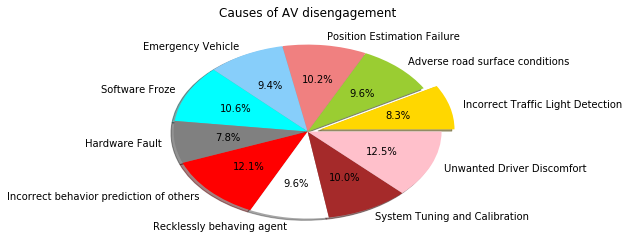

In [16]:
# plot a pie chart for the causes of AV disengagement
labels = df_disengagements['Cause'].unique()
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'cyan', 'grey', 'red', 'white', 'brown', 'pink']
plt.pie(df_disengagements.groupby('Cause').size(), explode=explode, shadow=True, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Causes of AV disengagement')
plt.show()

Unwated Driver Discomfort & Incorrect behavior prediction of others are the top 2 leading causes of disengagement.

### 4.

In [17]:
df_totalmiles['disen/miles'] = df_totalmiles['total number of disengagements']/df_totalmiles['miles driven in autonomous mode']

In [18]:
# creating a new column which separates the month and year from the Month column
df_totalmiles['sep_month'] = df_totalmiles['Month'].apply(lambda x:x.split('-')[1])

In [19]:
# changing the date format for Month
df_totalmiles['Month'] = pd.to_datetime(df_totalmiles['Month'], format="%y-%b")

Text(0.5,1,'Disengagement/mile over time with monthly granularity')

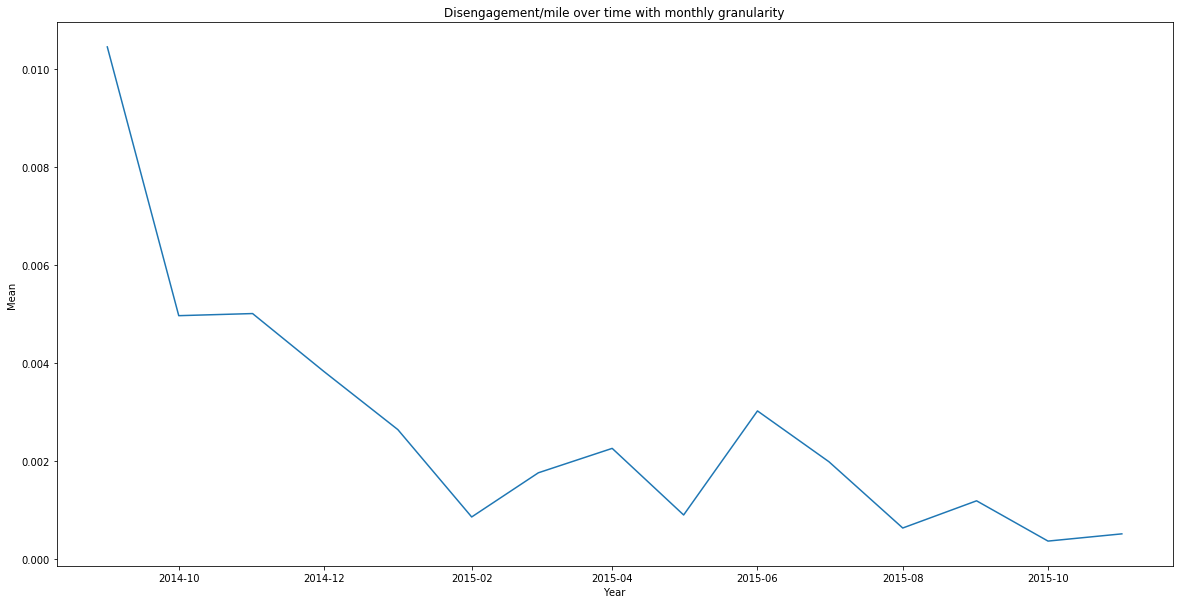

In [20]:
# visualizing the trend of disengagement/mile over time with monthly granularity.
plt.figure(figsize = (20,10))
plt.plot(df_totalmiles.groupby('Month')['disen/miles'].mean())
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Disengagement/mile over time with monthly granularity')

The trend follows an expoential curve as it falls off with a steep decrease. It is maturing over time.

## TASK I

### 1.


*  If samples are drawn from a random variable that follows the Gaussian distribution, the samples concentrate on mean value, which means that the more close to the mean value, the higher frenquency the observations have.  
*  If samples are drawn from a random variable that follows the exponential distribution, the numbers of observations decrease sharply and then slower as the value increasing. 
* Weibull distribution depends on  λ  and k values. For some  λ  and k values, the distribution is the same as Gaussian distribution. For some  λ  and k values, the distribution looks like exponential distribution. 

     

### 2.

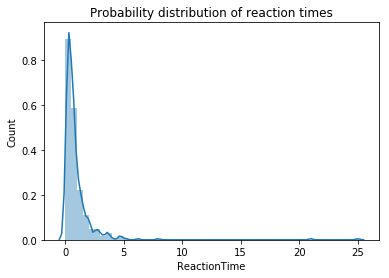

In [21]:
# remove missing values
df_dismiss = df_disengagements.dropna()
sns.distplot(df_dismiss['ReactionTime'])
plt.title('Probability distribution of reaction times')
plt.ylabel('Count')
plt.show()

The distribution fits a Weibull distribution. The fit distribution signify has one peak and looks not symmetrical because it has long tail. Therefore, the samples are more likely drawn from Weibull distribution.

### 3. 

### a.

In [22]:
### average reaction time for entire duration of dataset
df_disengagements['ReactionTime'].mean()

0.9297703252032526

### b.

In [23]:
### average reaction time for entire duration of dataset differentiated by location of disengagement
df_disengagements.groupby('Location')['ReactionTime'].mean()

Location
highway         1.48000
urban-street    0.92865
Name: ReactionTime, dtype: float64

### 4.


Suppose X is from the AV sample with mean 0.9, we want to check if the mean of X equals to the mean reaction value of Non-AVs $\mu=0.93$
$$H_{0}: \bar{X} = \mu \quad vs.\quad H_{A}: \bar{X} \neq \mu$$
Test statistic $t = \frac{\bar{X}-\mu}{s/\sqrt{n}} = \frac{1.09-0.93}{1.694/\sqrt{1024}} = 4.24$ \\
According to the T distribution table, when the degree of freedom is greater than 500, the t value i.e 4.24 is to the right which indicates a very low p-value. \\
Thus, we reject the null hypothesis at $\alpha = 0.05$

### 5.

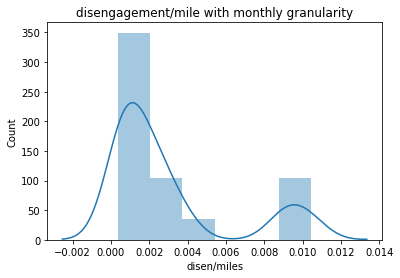

In [24]:
### probability distribution of disengagement/mile with monthly granularity
sns.distplot(df_totalmiles['disen/miles'])
plt.ylabel('Count')
plt.title('disengagement/mile with monthly granularity')
plt.show()

The above probability distribution does not fit any known distribution. The fit distribution signifies two peaks. More specifically, the samples are drawn from Bimodal distribution.

# TASK 2

## 1

### a.




The assumption on maximum number of disengagements in a mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a **bernoulli** distribution.

### b.

In [25]:
# checking the number of disengagements which happened during cloudy weather
len(df_disengagements[df_disengagements['Weather'] == 'cloudy'])

835

In [26]:
# checking the number of disengagements which happened during clear weather
len(df_disengagements[df_disengagements['Weather'] == 'clear'])

189

In [27]:
# probability of disengagement per mile on a cloudy day
len(df_disengagements[df_disengagements['Weather'] == 'cloudy'])/(df_totalmiles['miles driven in autonomous mode'].sum() * 0.28)

0.005902556775527249

### c.

In [28]:
# probability of disengagement per mile on a cloudy day
len(df_disengagements[df_disengagements['Weather'] == 'cloudy'])/(df_totalmiles['miles driven in autonomous mode'].sum() * 0.28)

0.005902556775527249

### d.

In [29]:
# probability of automatic disengagement per mile on a cloudy day -> P(automatic disengagement per mile in cloudy day) 
len(df_disengagements[(df_disengagements['TypeOfTrigger'] == 'automatic') & (df_disengagements['Weather'] == 'cloudy')])/(df_totalmiles['miles driven in autonomous mode'].sum() * 0.28)

0.0028063653172267283

In [30]:
# probability of automatic disengagement per mile on a clear day -> P(automatic disengagement per mile in clear day)
len(df_disengagements[(df_disengagements['TypeOfTrigger'] == 'automatic') & (df_disengagements['Weather'] == 'clear')])/(df_totalmiles['miles driven in autonomous mode'].sum() * 0.72)

0.00026390673008345393

### e.

Denote $X_{i}$ as a random variable from (a) that follows Bernoulli(p), p is calculated in (b), which is 0.0059.
$$Denote \quad Y = \sum_{i=1}^{10000}X_{i} \sim  Binomial(10000,p)$$
$$E(Y) = np=59, Var(Y)=np(1-p)=58.6519$$
The aymmptotic distribution is 
$$Z = \frac{Y-np}{\sqrt{np(1-p)}} = \frac{Y-59}{\sqrt{58.6519}} \sim N(0,1)$$
When Y = 150,  Z = 11.88, \\
$\therefore \quad P(Z \geq 11.88) \approx 0$ 

Therefore, in 10000 miles it is very unlikely to have 150 or more disengagements under cloudy days.

## 2.

Let $\widehat{p}_{1}$= 0.0059, the probability of disengagement per mile on a cloudy day,  $\widehat{p}_{2}$= 0.00052, the probability of disengagement per mile on a clear day.
$$H_{0}: p_{1} > p_{2} \quad  H_{A}: p_{1}\leq p_{2}$$
Z-Test Statistic for two proportions:
$$Z \cong \frac{(\widehat{p}_{1}-\widehat{p}_{2}) - (p_{1} - p_{2})}{\sqrt{\widehat{p}(1-\widehat{p})(\frac{1}{n_{1}}+ \frac{1}{n_{2} })}}, \quad where \quad \widehat{p} = \frac{X_{1}+X_{2}}{n_{1}+n_{2}}$$
$X_{1}$is the total number of cloudy day, $X_{2}$is the total number of clear day, $n_{1}+n_{2}$is the total miles

In [31]:
# p_hat
(len(df_disengagements[df_disengagements['Weather'] == 'cloudy'])+len(df_disengagements[df_disengagements['Weather'] == 'clear']))/df_totalmiles['miles driven in autonomous mode'].sum()

0.0020268036870409261

In [32]:
# denominator for the Z-Test formula
np.sqrt((0.002*0.098*(1/(df_totalmiles['miles driven in autonomous mode'].sum() * 0.28) + 1/(df_totalmiles['miles driven in autonomous mode'].sum() * 0.72))))

4.3867070871651753e-05

Plug in all the values:
$$Z = \frac{0.0059 - 0.00052}{4.39\times e^{-5}} = 122.55$$

The Z value is large enough to accept null hypothesis, therefore, in cloudy weather, AVs are more unsafty than clear days.

## 3.

In [33]:
# dropping the missing values since missing values will give incorrect results
df_cloudy = df_disengagements[(df_disengagements['TypeOfTrigger'] == 'automatic') & (df_disengagements['Weather'] == 'cloudy')]
df_cloudy = df_cloudy.dropna()

In [34]:
# the conditional probability that the reaction time greater than 0.5s given that the weather is cloudy
len(df_cloudy[df_cloudy['ReactionTime']>0.5])/len(df_cloudy)

0.5417721518987342

In [35]:
# dropping the missing values since missing values will give incorrect results
df_clear = df_disengagements[(df_disengagements['TypeOfTrigger'] == 'automatic') & (df_disengagements['Weather'] == 'clear')]
df_clear = df_clear.dropna()

In [36]:
# the conditional probability that the reaction time greater than 0.5s given that the weather is cloudy
len(df_clear[df_clear['ReactionTime']>0.7])/len(df_clear)

0.3854166666666667

## 4.

Using the total probability theorem and the conditional probabilities found in question 3. Denote the event $A_{1}$as automatic disengagement per mile in cloudy day, denote $A_{2}$as automatic disengagement per mile in clear day.
From question 1.d, we know $P(A_{1})=0.0028$ and $P(A_{2}
)= 0.00026$

$$P(accident) = P(accident| A_{1})P(A_{1}) + P(accident|A_{2})P(A_{2})$$
$$=0.542*0.0028+0.385*0.00026 = 0.0016=1.6 \times e^{-3}$$

## 5.

The probability of a human driver causing an accident is much smaller $2 \times e^{-6} $ in comparison to AVs causing accident which is $1.6 \times e^{-3} $. When an AV is on the road, in the case of an disengagement, the time it takes for a human to react is slower at times (considering that the human depends on the AV to do most of the work), thus causing many accidents whereas in case of a human driver driving a car, the driver's sole focus is on the road and in case of any problems the driver is quick to react in most of the cases, thus resulting in fewer accidents.

# TASK 3

### 1.

In [79]:
# adding a new variable "Class" to df_disengagements           
df_disengagements.loc[(df_disengagements['Cause'] == 'Incorrect behavior prediction of others') | \
                      (df_disengagements['Cause'] == 'Recklessly behaving agent') | \
                      (df_disengagements['Cause'] == 'Unwanted Driver Discomfort'),'Class']='Controller'
df_disengagements.loc[(df_disengagements['Cause'] == 'Adverse road surface conditions') |\
                      (df_disengagements['Cause'] == 'Emergency Vehicle') | \
                      (df_disengagements['Cause'] == 'Position Estimation Failure') |\
                      (df_disengagements['Cause'] == 'Incorrect Traffic Light Detection'),'Class']='Perception System'
df_disengagements.loc[(df_disengagements['Cause'] == 'System Tuning and Calibration') |\
                      (df_disengagements['Cause'] == 'Hardware Fault') |\
                      (df_disengagements['Cause'] == 'Software Froze'),'Class']='Computer System'

    

In [81]:
df_disengagements

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,Perception System
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,Perception System
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,Perception System
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,Perception System
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,Perception System
5,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.88,Incorrect Traffic Light Detection,Perception System
6,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.41,Emergency Vehicle,Perception System
7,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.45,Emergency Vehicle,Perception System
8,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.07,Software Froze,Computer System
9,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.37,Hardware Fault,Computer System
